# Predicting Water Temperature

### Reading in Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import itertools
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data = pd.read_csv("C:/Users/aniru/STAT303_02/Data/bottle.csv")

C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2351790357.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/aniru/STAT303_02/Data/bottle.csv")


In [3]:
data.shape

(864863, 74)

In [105]:
data.tail()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864862,34404,864863,093.4 026.4,20-1611SR-MX-310-2239-09340264-0015A-3,15,17.533,33.3880,5.774,24.15297,105.66,...,0.61,15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
pd.set_option('display.max_columns', None)


In [129]:
#Used this to see how many responses were missing. Removed all greater than 60%
(data.isnull().sum()/len(data)).sort_values()

Cst_Cnt                0.000000
Btl_Cnt                0.000000
Sta_ID                 0.000000
Depth_ID               0.000000
Depthm                 0.000000
                         ...   
TA2                    0.999729
DIC2                   0.999741
pH1                    0.999903
DIC Quality Comment    0.999936
pH2                    0.999988
Length: 74, dtype: float64

### Cleaned Dataset

Here, we employed 3 steps to find relevant predictors for water temperature. 
1) Removed all predictors with missing values greater than 60% of the total values

2) Removed all repeated predictors (all columns with R in front were "rounded" versions of other columns)

3) Removed all predictors with high correlations to other predictors, using data.corr()

In [5]:
data_cleaned = data.loc[:,["Depthm","T_degC","Salnty","O2ml_L","STheta","RecInd","T_prec","S_prec","P_qual","Chlqua","Phaqua","NH3q","C14A1q"]]

In [6]:
data_cleaned.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,NH3q,C14A1q
0,0,10.50,33.440,NaN,25.649,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0
1,8,10.46,33.440,NaN,25.656,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0
2,10,10.46,33.437,NaN,25.654,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0
3,19,10.45,33.420,NaN,25.643,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0
4,20,10.45,33.421,NaN,25.643,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0


In [7]:
X = data_cleaned.columns

In [8]:
data_cleaned.isnull().sum()

Depthm         0
T_degC     10963
Salnty     47354
O2ml_L    168662
STheta     52689
RecInd         0
T_prec     10963
S_prec     47354
P_qual    191108
Chlqua    225697
Phaqua    225693
NH3q       56564
C14A1q     16258
dtype: int64

### Treating Missing Values

Here, we either dropped values or filled it in with the mean. To determine this, we graphed the distribution after filling values with mean, and observed if there was a big spike or not. 

C:\Users\aniru\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aniru\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

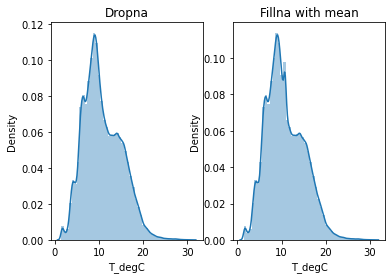

In [9]:
fig, ax=plt.subplots(1,2)
sns.distplot(data_cleaned.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(data_cleaned.T_degC.fillna(data_cleaned.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

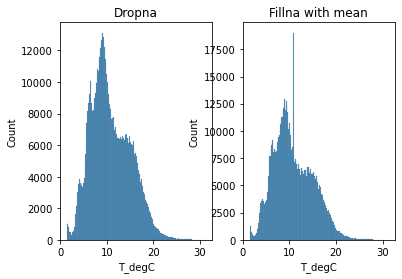

In [146]:
fig, ax=plt.subplots(1,2)
sns.histplot(data_cleaned.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(data_cleaned.T_degC.fillna(data_cleaned.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [10]:
#decide to drop missing values for the temperature variable, to avoid spike by plugging in mean
data_cleaned = data_cleaned[data_cleaned['T_degC'].notna()]
#decide to drop missing values from salinity variable, as it's dependent we don't care abt missing values
data_cleaned = data_cleaned[data_cleaned['Salnty'].notna()]


In [11]:
data_cleaned.isnull().sum()

Depthm         0
T_degC         0
Salnty         0
O2ml_L    152758
STheta      2073
RecInd         0
T_prec         0
S_prec         0
P_qual    190667
Chlqua    222095
Phaqua    222092
NH3q       56561
C14A1q     14627
dtype: int64

C:\Users\aniru\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aniru\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

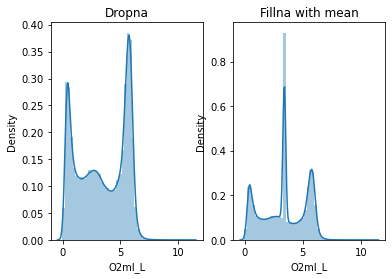

In [12]:
fig, ax=plt.subplots(1,2)
sns.distplot(data_cleaned.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(data_cleaned.O2ml_L.fillna(data_cleaned.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

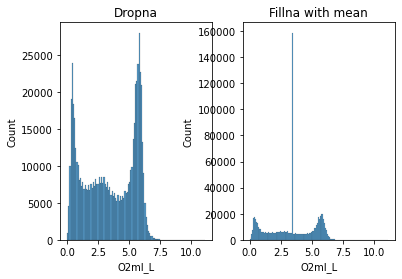

In [150]:
fig, ax=plt.subplots(1,2)
sns.histplot(data_cleaned.O2ml_L.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(data_cleaned.O2ml_L.fillna(data_cleaned.O2ml_L.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [13]:
#decide to drop to avoid spike for O2ml_L variable
data_cleaned = data_cleaned[data_cleaned['O2ml_L'].notna()]

C:\Users\aniru\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aniru\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fillna with mean')

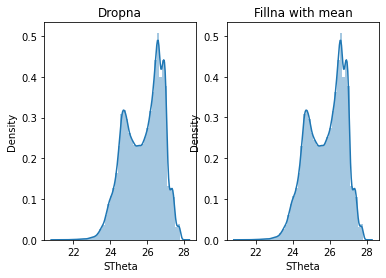

In [19]:
fig, ax=plt.subplots(1,2)
sns.distplot(num_data.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(num_data.STheta.fillna(num_data.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

Text(0.5, 1.0, 'Fillna with mean')

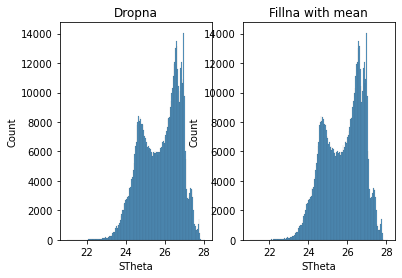

In [20]:
fig, ax=plt.subplots(1,2)
sns.histplot(num_data.STheta.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(num_data.STheta.fillna(num_data.STheta.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

In [14]:
#decide to fill in with mean as there is no spike to avoid
data_cleaned['STheta'] = data_cleaned['STheta'].fillna(data_cleaned['STheta'].mean())

In [154]:
data_cleaned.isnull().sum()

Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
RecInd         0
T_prec         0
S_prec         0
P_qual    186282
Chlqua    221338
Phaqua    221337
NH3q       56486
C14A1q     14558
dtype: int64

In [15]:
data_cleaned = data_cleaned[data_cleaned['P_qual'].notna()]
data_cleaned = data_cleaned[data_cleaned['Chlqua'].notna()]
data_cleaned = data_cleaned[data_cleaned['Phaqua'].notna()]
data_cleaned = data_cleaned[data_cleaned['NH3q'].notna()]
data_cleaned = data_cleaned[data_cleaned['C14A1q'].notna()]

In [155]:
fig, ax=plt.subplots(1,2)
sns.histplot(data_cleaned.P_qual.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.histplot(data_cleaned.P_qual.fillna(data_cleaned.P_qual.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000019AEBD66E50> (for post_execute):


KeyboardInterrupt: 

# EDA

Pairplots

In [17]:
sns.pairplot(data_cleaned)

Error in callback <function flush_figures at 0x000001CF7C1F0790> (for post_execute):



KeyboardInterrupt



In [18]:
correlation = data_cleaned.corr()
correlation

,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,NH3q,C14A1q
Depthm,1.000000,-0.660287,0.511076,-0.538436,0.658770,0.081390,0.040641,0.108113,0.001086,NaN,NaN,NaN,NaN
T_degC,-0.660287,1.000000,-0.375203,0.758085,-0.959316,-0.116642,-0.027041,-0.157821,-0.000917,NaN,NaN,NaN,NaN
Salnty,0.511076,-0.375203,1.000000,-0.768031,0.600669,0.061246,-0.000591,0.098107,0.003341,NaN,NaN,NaN,NaN
O2ml_L,-0.538436,0.758085,-0.768031,1.000000,-0.870741,-0.102903,-0.001954,-0.123962,-0.002352,NaN,NaN,NaN,NaN
STheta,0.658770,-0.959316,0.600669,-0.870741,1.000000,0.113826,0.022240,0.163444,0.001755,NaN,NaN,NaN,NaN
RecInd,0.081390,-0.116642,0.061246,-0.102903,0.113826,1.000000,0.083007,0.678485,0.001585,NaN,NaN,NaN,NaN
T_prec,0.040641,-0.027041,-0.000591,-0.001954,0.022240,0.083007,1.000000,0.067971,0.000058,NaN,NaN,NaN,NaN
S_prec,0.108113,-0.157821,0.098107,-0.123962,0.163444,0.678485,0.067971,1.000000,-0.001151,NaN,NaN,NaN,NaN
P_qual,0.001086,-0.000917,0.003341,-0.002352,0.001755,0.001585,0.000058,-0.001151,1.000000,NaN,NaN,NaN,NaN
Chlqua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Results

Seems like T_degC is very closely related to Depthm, STheta and O2ml_L. However, STheta and Depthm also have really high correlations, along with Slnty & O2ml_L. It seems like the main predictors have pretty close correlations with each other - perhaps only one of these predictors will have most of the explanatory power. 

In our presentation model, we noticed that STheta had most of the predicting power. We expect that to occur again, so we decided to make multiple models. One with Stheta, one without Stheta, and one without any of the variables that correlate heavily with Stheta.

Additionally, it seems like 'Chlqua','Phaqua','NH3q','C14A1q' are similar values once you drop the missing values from the initial dataset. Thus, we decided to drop these columns as well. The lack of correlation is also troubling. 

In [19]:
data_cleaned.drop(['Chlqua','Phaqua','NH3q','C14A1q'],axis = 1, inplace = True)

<AxesSubplot:>

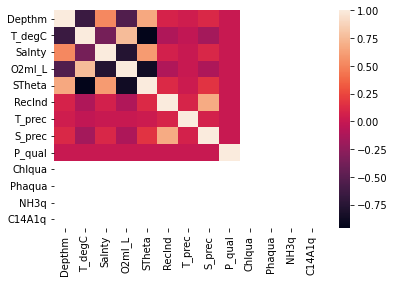

In [20]:
sns.heatmap(correlation)

ValueError: The condensed distance matrix must contain only finite values.

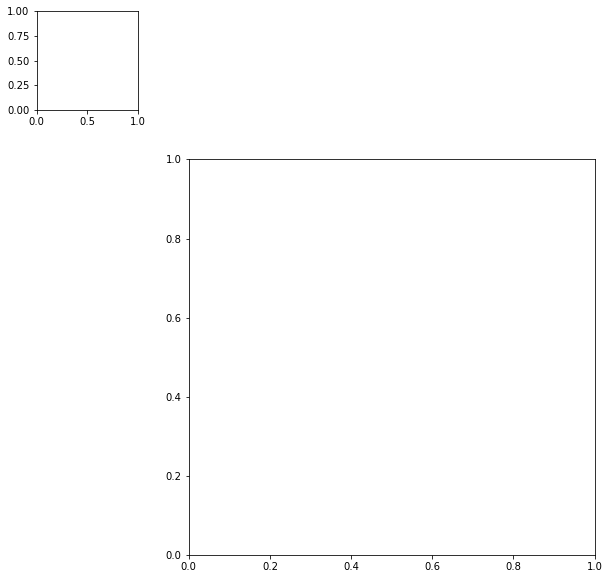

In [21]:
sns.clustermap(correlation, cmap='RdBu',center=0)

The correlation matrix confirms the strong correlation between R_Pres & Depthm (0.9999). Additionally, STheta & T_degC seemt o have a pretty strong negative correlation as well. 

### Splitting Data

Here, we split data based on the 75/25 rule. *Someone should split on year*

In [16]:
split = (np.random.rand(len(data_cleaned)) <= 0.75)
training = data_cleaned[split]
testing = data_cleaned[~split]

print(f"No. of training examples: {training.shape[0]}")
print(f"No. of testing examples: {testing.shape[0]}")

No. of training examples: 289643
No. of testing examples: 96729


In [23]:
training.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,T_prec,S_prec,P_qual
2160,0,10.30,33.030,5.90,25.364,3,1.0,2.0,9.0
2161,6,18.46,32.920,6.02,23.568,3,2.0,2.0,9.0
2164,20,10.33,33.005,6.04,25.339,7,2.0,3.0,9.0
2166,31,10.40,33.060,6.01,25.371,3,2.0,2.0,9.0
2168,50,10.35,33.167,5.76,25.463,7,2.0,3.0,9.0


In [24]:
testing.head()

,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,T_prec,S_prec,P_qual
2162,10,10.29,32.951,6.04,25.304,7,2.0,3.0,9.0
2163,15,10.29,32.990,6.06,25.335,3,2.0,2.0,9.0
2165,30,10.39,33.054,6.01,25.368,7,2.0,3.0,9.0
2167,47,10.36,33.150,5.78,25.448,3,2.0,2.0,9.0
2178,250,7.53,34.058,1.19,26.606,7,2.0,3.0,9.0


# Model Creation

### Defining columns


In [26]:
X = training[['Salnty','O2ml_L', 'STheta','RecInd','T_prec','S_prec','P_qual']]
X_backup = training[['Salnty','O2ml_L', 'STheta','RecInd','T_prec','S_prec','P_qual']]


### Creating Interaction Terms

In [27]:
for combo in itertools.combinations(X.columns, 2):    
    training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
    testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
    X.loc[:,'_'.join(combo)] = training.loc[:,'_'.join(combo)] 

C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\4241619764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\4241619764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\4241619764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\4241619764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\4241619764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\4241619764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\4241619764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\4241619764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\4241619764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

### Helper Functions

In [28]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.ols('T_degC~' + '+'.join(predictor_subset),data = training).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}



### Best Subset Selection (Takes Too long with Interaction Terms, Don't Use)

In [29]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")


KeyboardInterrupt



AttributeError: 'DataFrame' object has no attribute 'argmax'

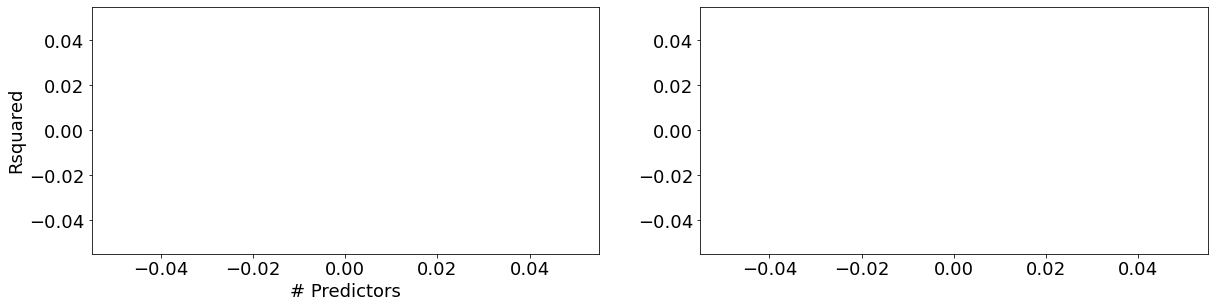

In [30]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [89]:
best_subset = models_best['model'][6]
best_subset.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 T_degC   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.040e+07
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:44:29   Log-Likelihood:            -2.1780e+05
No. Observations:              496312   AIC:                         4.356e+05
Df Residuals:                  496305   BIC:                         4.357e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       141.9157      1.912     74.239      0.000     138.169     145.662
Salnty            1.0810      0.055     19.490      0.000       0.972       1.190
O2ml_L            0.9751      0.038     25.960      0.000       0.902       1.049
STheta          -11.1144      0.073   -152.473      0.000     -11.257     -10.971
Salnty_O2ml_L    -0.2892      0.001   -249.580      0.000      -0.291      -0.287
Salnty_STheta     0.1370      0.002     64.908      0.000       0.133       0.141
O2ml_L_STheta     0.3405      0.001    551.505      0.000       0.339       0.342
==============================================================================
Omnibus:                   306595.794   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         66825849.088
Skew:                          -1.891   Prob(JB):                         0.00
Kurtosis:                      59.720   Cond. No.                     3.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
pred_temp = best_subset.predict(testing)
RMSE_best = np.sqrt(((pred_temp - testing.T_degC)**2).mean())
print(RMSE_best)

0.3765448370385607


### Helper Functions for Forward Selection

In [31]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [32]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

### Actual Forward Selection

In [33]:
models_best = forward_selection()

Processed  28 models on 1 predictors in 2.6447980403900146 seconds.
Processed  27 models on 2 predictors in 2.9647278785705566 seconds.
Processed  26 models on 3 predictors in 3.342515230178833 seconds.
Processed  25 models on 4 predictors in 3.7757375240325928 seconds.
Processed  24 models on 5 predictors in 4.929057598114014 seconds.
Processed  23 models on 6 predictors in 5.238373517990112 seconds.
Processed  22 models on 7 predictors in 5.1745524406433105 seconds.
Processed  21 models on 8 predictors in 5.7791595458984375 seconds.
Processed  20 models on 9 predictors in 5.972899436950684 seconds.
Processed  19 models on 10 predictors in 6.530163049697876 seconds.
Processed  18 models on 11 predictors in 6.185184955596924 seconds.
Processed  17 models on 12 predictors in 6.282543182373047 seconds.
Processed  16 models on 13 predictors in 7.13232684135437 seconds.
Processed  15 models on 14 predictors in 7.039533615112305 seconds.
Processed  14 models on 15 predictors in 6.6784815788

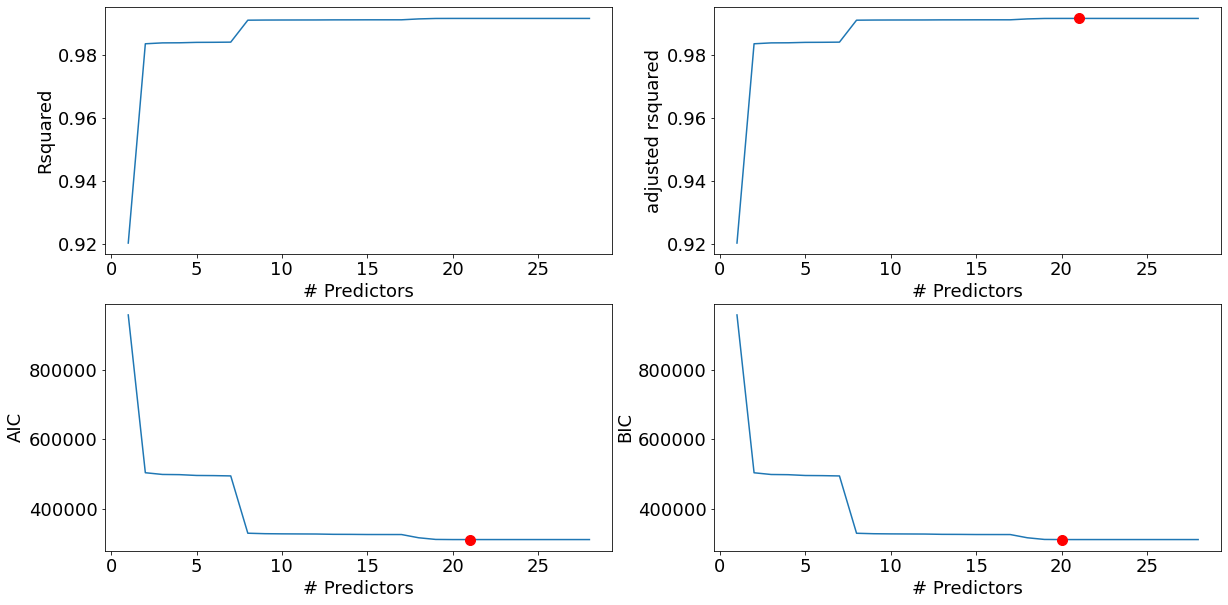

In [34]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [35]:
best_fwd_reg_model = models_best['model'][20]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 T_degC   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.697e+06
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:28:44   Log-Likelihood:            -1.5524e+05
No. Observations:              289631   AIC:                         3.105e+05
Df Residuals:                  289610   BIC:                         3.107e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       207.7350      2.945     70.539      0.000     201.963     213.507
STheta          -16.1440      0.098   -164.899      0.000     -16.336     -15.952
Salnty           -2.0987      0.085    -24.681      0.000      -2.265      -1.932
Salnty_STheta     0.3303      0.003    118.375      0.000       0.325       0.336
STheta_RecInd     0.0418      0.001     37.570      0.000       0.040       0.044
Salnty_RecInd     0.0674      0.002     35.945      0.000       0.064       0.071
O2ml_L_RecInd     0.0222      0.001     34.466      0.000       0.021       0.023
O2ml_L_STheta     0.3824      0.001    496.750      0.000       0.381       0.384
Salnty_O2ml_L    -0.2378      0.002   -156.441      0.000      -0.241      -0.235
RecInd           -3.3761      0.077    -43.887      0.000      -3.527      -3.225
O2ml_L_S_prec    -0.2838      0.003   -104.579      0.000      -0.289      -0.279
O2ml_L           -0.9636      0.054    -17.977      0.000      -1.069      -0.859
STheta_T_prec    -0.3071      0.014    -22.742      0.000      -0.334      -0.281
T_prec           23.9719      0.866     27.674      0.000      22.274      25.670
Salnty_T_prec    -0.4707      0.024    -19.847      0.000      -0.517      -0.424
O2ml_L_T_prec    -0.1554      0.009    -17.804      0.000      -0.172      -0.138
RecInd_T_prec     0.0422      0.005      8.089      0.000       0.032       0.052
STheta_S_prec    -0.5201      0.005   -114.021      0.000      -0.529      -0.511
S_prec           32.8714      0.319    103.054      0.000      32.246      33.497
Salnty_S_prec    -0.5382      0.008    -70.195      0.000      -0.553      -0.523
RecInd_S_prec    -0.0568      0.003    -19.729      0.000      -0.062      -0.051
==============================================================================
Omnibus:                   178961.984   Durbin-Watson:                   0.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3212750.108
Skew:                          -2.670   Prob(JB):                         0.00
Kurtosis:                      18.418   Cond. No.                     3.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
pred_temp_fwd = best_fwd_reg_model.predict(testing)
RMSE_fwd = np.sqrt(((pred_temp_fwd - testing.T_degC)**2).mean())
print(RMSE_fwd)

0.4150558394063517


### Without Using STheta, but with Using Deptm (High. Corr to Stheta)

In [37]:
X_n = training[['Salnty','O2ml_L', 'RecInd','T_prec','S_prec','P_qual','Depthm']]
X_n_backup = training[['Salnty','O2ml_L', 'RecInd','T_prec','S_prec','P_qual','Depthm']]

In [38]:
for combo in itertools.combinations(X_n.columns, 2):    
    training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
    testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
    X_n.loc[:,'_'.join(combo)] = training.loc[:,'_'.join(combo)] 

C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\1639618788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\1639618788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\1639618788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\1639618788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_n.loc[:,'_'.join(combo)] = training.loc[:,'_'.join(combo)]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\1639618788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\1639618788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\1639618788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\1639618788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_7484\1639618788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [39]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_n.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [40]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X_n.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [41]:
models_best = forward_selection()

Processed  28 models on 1 predictors in 2.9525227546691895 seconds.
Processed  27 models on 2 predictors in 2.9017622470855713 seconds.
Processed  26 models on 3 predictors in 3.245591163635254 seconds.
Processed  25 models on 4 predictors in 3.64458966255188 seconds.
Processed  24 models on 5 predictors in 4.221986532211304 seconds.
Processed  23 models on 6 predictors in 4.5837242603302 seconds.
Processed  22 models on 7 predictors in 5.575544595718384 seconds.
Processed  21 models on 8 predictors in 5.468598365783691 seconds.
Processed  20 models on 9 predictors in 5.785282135009766 seconds.
Processed  19 models on 10 predictors in 6.466112852096558 seconds.
Processed  18 models on 11 predictors in 6.360177040100098 seconds.
Processed  17 models on 12 predictors in 6.594625473022461 seconds.
Processed  16 models on 13 predictors in 6.800900936126709 seconds.
Processed  15 models on 14 predictors in 6.863179683685303 seconds.
Processed  14 models on 15 predictors in 6.736451625823975

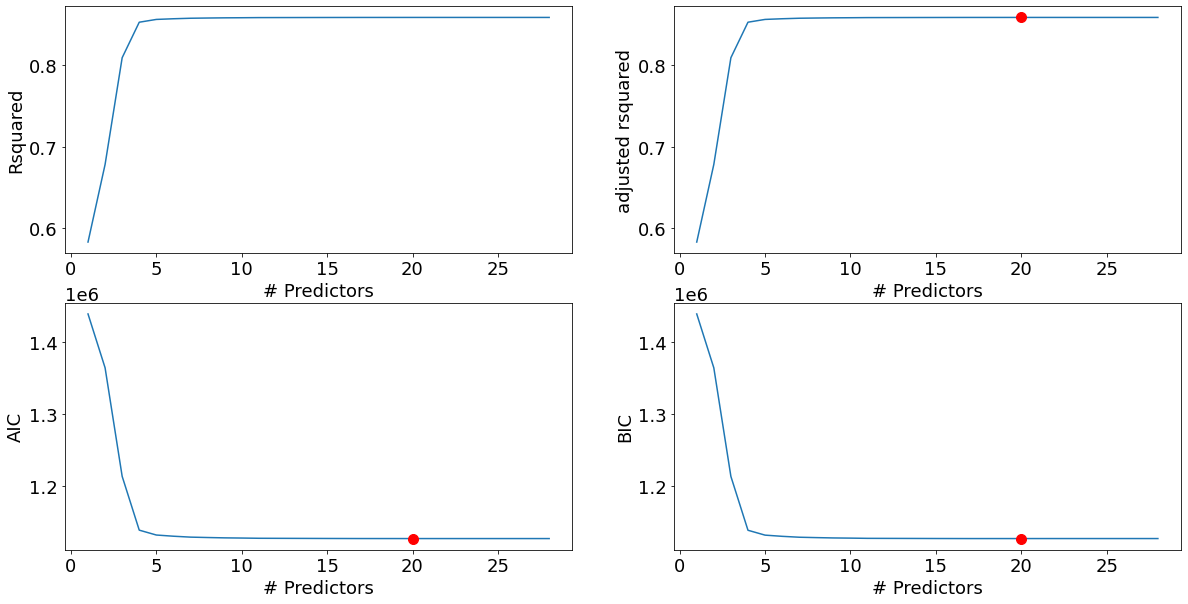

In [42]:
best_sub_plots()

In [43]:
best_fwd_reg_model_no = models_best['model'][20]
best_fwd_reg_model_no.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 T_degC   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 8.782e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:32:22   Log-Likelihood:            -5.6326e+05
No. Observations:              289631   AIC:                         1.127e+06
Df Residuals:                  289610   BIC:                         1.127e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -130.7352      7.498    -17.437      0.000    -145.430    -116.040
Salnty_O2ml_L     0.0088      0.006      1.498      0.134      -0.003       0.020
Salnty            4.2683      0.217     19.658      0.000       3.843       4.694
P_qual_Depthm    -0.0648      0.000   -244.838      0.000      -0.065      -0.064
Salnty_Depthm     0.0166   6.92e-05    240.348      0.000       0.016       0.017
O2ml_L_Depthm    -0.0006    9.4e-06    -69.141      0.000      -0.001      -0.001
O2ml_L_S_prec    -0.1196      0.007    -17.215      0.000      -0.133      -0.106
O2ml_L_RecInd     0.0083      0.002      5.110      0.000       0.005       0.011
S_prec_Depthm     0.0011   3.11e-05     34.486      0.000       0.001       0.001
RecInd_Depthm    -0.0001   6.22e-06    -19.126      0.000      -0.000      -0.000
Salnty_S_prec    -0.2742      0.031     -8.892      0.000      -0.335      -0.214
S_prec            7.6392      1.074      7.114      0.000       5.535       9.744
O2ml_L_P_qual     0.1532      0.023      6.629      0.000       0.108       0.199
T_prec_Depthm     0.0005   6.28e-05      7.196      0.000       0.000       0.001
T_prec          -18.6898      3.604     -5.185      0.000     -25.754     -11.626
T_prec_S_prec     0.7732      0.087      8.916      0.000       0.603       0.943
RecInd_P_qual     0.2306      0.030      7.782      0.000       0.173       0.289
Salnty_RecInd    -0.0557      0.008     -7.266      0.000      -0.071      -0.041
RecInd_S_prec    -0.0418      0.011     -3.635      0.000      -0.064      -0.019
O2ml_L_T_prec     0.1421      0.027      5.252      0.000       0.089       0.195
Salnty_T_prec     0.4637      0.104      4.444      0.000       0.259       0.668
==============================================================================
Omnibus:                    57982.299   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           328899.987
Skew:                           0.849   Prob(JB):                         0.00
Kurtosis:                       7.937   Cond. No.                     4.43e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
pred_t = best_fwd_reg_model_no.predict(testing)
RMSE_no = np.sqrt(((pred_t - testing.T_degC)**2).mean())
print(RMSE_no)

1.6893953873032483


### Without Using Stheta or Depthm

In [17]:
X_n_2 = training[['Salnty','O2ml_L', 'RecInd','T_prec','S_prec','P_qual']]
X_n_backup_2 = training[['Salnty','O2ml_L', 'RecInd','T_prec','S_prec','P_qual']]

In [18]:
for combo in itertools.combinations(X_n_2.columns, 2):    
    training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
    testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
    X_n_2.loc[:,'_'.join(combo)] = training.loc[:,'_'.join(combo)] 

C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\3827701557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\3827701557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\3827701557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\3827701557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\3827701557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\3827701557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [19]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_n_2.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [48]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X_n_2.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [49]:
models_best = forward_selection()

Processed  21 models on 1 predictors in 1.9556808471679688 seconds.
Processed  20 models on 2 predictors in 2.125230312347412 seconds.
Processed  19 models on 3 predictors in 2.4084975719451904 seconds.
Processed  18 models on 4 predictors in 2.621716260910034 seconds.
Processed  17 models on 5 predictors in 3.100856304168701 seconds.
Processed  16 models on 6 predictors in 3.4288153648376465 seconds.
Processed  15 models on 7 predictors in 3.5576062202453613 seconds.
Processed  14 models on 8 predictors in 3.760739326477051 seconds.
Processed  13 models on 9 predictors in 3.8637747764587402 seconds.
Processed  12 models on 10 predictors in 4.414477348327637 seconds.
Processed  11 models on 11 predictors in 4.282586574554443 seconds.
Processed  10 models on 12 predictors in 3.805227279663086 seconds.
Processed  9 models on 13 predictors in 3.6194686889648438 seconds.
Processed  8 models on 14 predictors in 3.8148951530456543 seconds.
Processed  7 models on 15 predictors in 3.4202866554

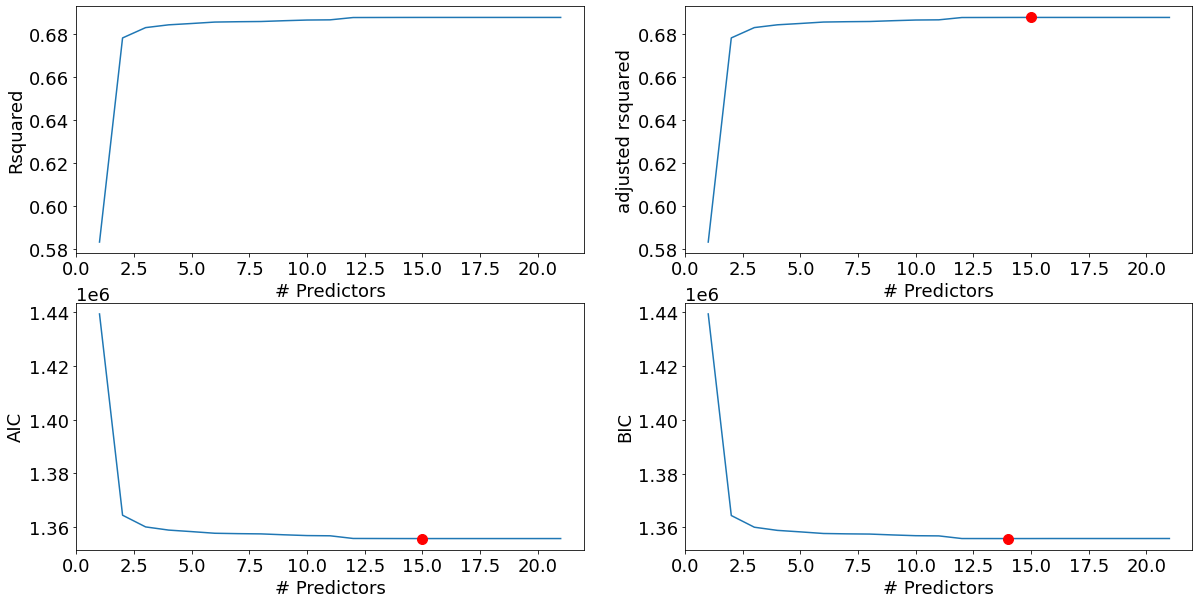

In [50]:
best_sub_plots()

In [51]:
best_fwd_reg_model_no_2 = models_best['model'][15]
best_fwd_reg_model_no_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 T_degC   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                 4.253e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:33:59   Log-Likelihood:            -6.7782e+05
No. Observations:              289631   AIC:                         1.356e+06
Df Residuals:                  289615   BIC:                         1.356e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -414.5809     10.369    -39.983      0.000    -434.904    -394.258
Salnty_O2ml_L    -0.1632      0.006    -25.120      0.000      -0.176      -0.150
Salnty           12.4464      0.301     41.412      0.000      11.857      13.035
T_prec_S_prec     0.8146      0.257      3.172      0.002       0.311       1.318
O2ml_L            9.0148      0.239     37.708      0.000       8.546       9.483
O2ml_L_RecInd     0.0480      0.002     20.215      0.000       0.043       0.053
O2ml_L_S_prec    -0.3683      0.010    -37.642      0.000      -0.387      -0.349
RecInd_T_prec     0.1297      0.060      2.152      0.031       0.012       0.248
Salnty_T_prec    -1.8926      0.144    -13.107      0.000      -2.176      -1.610
RecInd_S_prec    -0.2439      0.017    -14.332      0.000      -0.277      -0.211
T_prec           60.2253      4.981     12.091      0.000      50.462      69.988
Salnty_S_prec    -1.2385      0.045    -27.546      0.000      -1.327      -1.150
S_prec           41.5581      1.634     25.433      0.000      38.355      44.761
Salnty_RecInd     0.0595      0.011      5.320      0.000       0.038       0.081
RecInd           -1.6435      0.408     -4.024      0.000      -2.444      -0.843
O2ml_L_T_prec    -0.1146      0.041     -2.823      0.005      -0.194      -0.035
==============================================================================
Omnibus:                    28531.468   Durbin-Watson:                   0.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180313.199
Skew:                          -0.255   Prob(JB):                         0.00
Kurtosis:                       6.832   Cond. No.                     5.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
pred_t_2 = best_fwd_reg_model_no_2.predict(testing)
RMSE_no_2 = np.sqrt(((pred_t_2 - testing.T_degC)**2).mean())
print(RMSE_no)

1.6893953873032483


### Ridge Regression

In [89]:
split = (np.random.rand(len(data_cleaned)) <= 0.75)
training = data_cleaned[split]
testing = data_cleaned[~split]

print(f"No. of training examples: {training.shape[0]}")
print(f"No. of testing examples: {testing.shape[0]}")

No. of training examples: 289282
No. of testing examples: 97090


In [90]:
y = training['T_degC']

In [91]:
X_n_backup = training[['STheta','Salnty','O2ml_L', 'RecInd','T_prec','S_prec','P_qual']]

In [92]:
for combo in itertools.combinations(X_n_backup.columns, 2):    
    training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
    testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
    X_n_backup.loc[:,'_'.join(combo)] = training.loc[:,'_'.join(combo)] 

C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_n_backup.loc[:,'_'.join(combo)] = training.loc[:,'_'.join(combo)]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_n_backup.loc[:,'_'.join(combo)] = training.loc[:,'_'.join(combo)]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X_n_backup)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
X_nstd = scaler.transform(X_n_backup)

#Alphas
alphas = 10**np.linspace(2,0.5,200)*0.5
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(X_nstd, y)
    coefs.append(ridge.coef_)
    
#Optimal Lambda
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(X_nstd, y)

#Optimal value of the tuning parameter - lambda
print("The optimal value is " + str(ridgecv.alpha_))

The optimal value is 3.7657755072800003


In [94]:
#Standarized test data
#Test dataset
X_test = testing[X_n_backup.columns]
#Standardizing test data
X_test_std = scaler.transform(X_test)


In [95]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_nstd, y)
#Test 1 and Test 2
pred_r=ridge.predict(X_test_std)


In [96]:
ridge_coef = pd.DataFrame({'feature': X_n_backup.columns, 'coefficient': ridge.coef_})
ridge_coef

,feature,coefficient
0,STheta,-6.463747
1,Salnty,-0.102579
2,O2ml_L,-0.949369
3,RecInd,-1.095068
4,T_prec,0.933047
5,S_prec,4.604633
6,P_qual,0.075232
7,STheta_Salnty,9.814337
8,STheta_O2ml_L,17.655116
9,STheta_RecInd,1.217838


### RMSE & R^2

In [97]:
RMSE_1 = np.sqrt(((pred_r - testing.T_degC)**2).mean())
RMSE_1

0.41601713966270326

In [98]:
y_test = testing['T_degC']

In [99]:
from sklearn.metrics import r2_score
r2 = ridge.score(X_test_std, y_test)
r2

0.9914530783745096

### Lasso

In [100]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_nstd, y)
    coefs.append(lasso.coef_)

In [101]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(X_nstd, y)

#Optimal value of the tuning parameter - lamda
print("The optimal value is " + str(lassocv.alpha_))

The optimal value is 1.5811388300841898


In [102]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_nstd, y)
pred_lasso = lasso.predict(X_test_std)
#RMSE
RMSE_lasso = np.sqrt(((pred_lasso - testing.T_degC)**2).mean())
RMSE_lasso

2.0304886719912663

In [103]:
lasso_coef = pd.DataFrame({'feature': X_n_backup.columns, 'coefficient': lasso.coef_})
lasso_coef

,feature,coefficient
0,STheta,-2.73108
1,Salnty,-0.00000
2,O2ml_L,0.00000
3,RecInd,-0.00000
4,T_prec,-0.00000
5,S_prec,-0.00000
6,P_qual,0.00000
7,STheta_Salnty,-0.00000
8,STheta_O2ml_L,0.00000
9,STheta_RecInd,-0.00000


In [104]:
r2 = lasso.score(X_test_std, y_test)
r2

0.7963950107291848

### Ridge Regression (on Non STheta/Depthm Data)

In [20]:
split = (np.random.rand(len(data_cleaned)) <= 0.75)
training = data_cleaned[split]
testing = data_cleaned[~split]

print(f"No. of training examples: {training.shape[0]}")
print(f"No. of testing examples: {testing.shape[0]}")

No. of training examples: 289467
No. of testing examples: 96905


In [45]:
y = training['T_degC']

In [66]:
X_n_backup = training[['Salnty','O2ml_L', 'RecInd','T_prec','S_prec','P_qual']]

In [67]:
for combo in itertools.combinations(X_n_backup.columns, 2):    
    training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
    testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
    X_n_backup.loc[:,'_'.join(combo)] = training.loc[:,'_'.join(combo)] 

C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['_'.join(combo)] = testing[combo[0]]*testing[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_n_backup.loc[:,'_'.join(combo)] = training.loc[:,'_'.join(combo)]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['_'.join(combo)] = training[combo[0]]*training[combo[1]]
C:\Users\aniru\AppData\Local\Temp\ipykernel_31832\2807064698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X_n_backup)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
X_nstd = scaler.transform(X_n_backup)

#Alphas
alphas = 10**np.linspace(2,0.5,200)*0.5
coefs = []
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(X_nstd, y)
    coefs.append(ridge.coef_)
    
#Optimal Lambda
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(X_nstd, y)

#Optimal value of the tuning parameter - lambda
print("The optimal value is " + str(ridgecv.alpha_))

The optimal value is 15.629492582411705


In [69]:
#Standarized test data
#Test dataset
X_test = testing[X_n_backup.columns]
#Standardizing test data
X_test_std = scaler.transform(X_test)


In [70]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_nstd, y)
#Test 1 and Test 2
pred_r=ridge.predict(X_test_std)


In [71]:
ridge_coef = pd.DataFrame({'feature': X_n_backup.columns, 'coefficient': ridge.coef_})
ridge_coef

,feature,coefficient
0,Salnty,1.946532
1,O2ml_L,5.805757
2,RecInd,1.475993
3,T_prec,1.186008
4,S_prec,3.376198
5,P_qual,-0.128406
6,Salnty_O2ml_L,-5.887584
7,Salnty_RecInd,-2.198337
8,Salnty_T_prec,-2.962872
9,Salnty_S_prec,-7.386258


### RMSE & R^2

In [72]:
RMSE_1 = np.sqrt(((pred_r - testing.T_degC)**2).mean())
RMSE_1

2.5205268190158927

In [80]:
y_test = testing['T_degC']

In [82]:
from sklearn.metrics import r2_score
r2 = ridge.score(X_test_std, y_test)
r2

0.6864057191665557

### Lasso

In [85]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_nstd, y)
    coefs.append(lasso.coef_)

In [86]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(X_nstd, y)

#Optimal value of the tuning parameter - lamda
print("The optimal value is " + str(lassocv.alpha_))

The optimal value is 1.5811388300841898


In [75]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_nstd, y)
pred_lasso = lasso.predict(X_test_std)
#RMSE
RMSE_lasso = np.sqrt(((pred_lasso - testing.T_degC)**2).mean())
RMSE_lasso

3.3129867095406134

In [87]:
lasso_coef = pd.DataFrame({'feature': X_n_backup.columns, 'coefficient': lasso.coef_})
lasso_coef

,feature,coefficient
0,Salnty,-0.000000
1,O2ml_L,0.000000
2,RecInd,-0.000000
3,T_prec,-0.000000
4,S_prec,-0.000000
5,P_qual,0.000000
6,Salnty_O2ml_L,1.852214
7,Salnty_RecInd,-0.000000
8,Salnty_T_prec,-0.000000
9,Salnty_S_prec,-0.000000


In [88]:
r2 = lasso.score(X_test_std, y_test)
r2

0.4582176216261685